## *Advanced Dungeons & Dragons* 1st edition ability score methods

[Source for these methods.](https://www.reddit.com/r/dndnext/comments/6gv1qn/gary_gygaxs_ability_score_creation_methods_from)

> **Method I:**
>
> All scores are recorded and arranged in the order the player desires. 4d6 are rolled, and the lowest die (or one of the lower) is discarded.
>
> **Method II:**
>
> All scores are recorded and arranged as in Method I. 3d6 are rolled 12 times and the highest 6 scores are retained.
>
> **Method III:**
>
> Scores rolled are according to each ability category, in order, STRENGTH, INTELLIGENCE, WISDOM, DEXTERITY, CONSTITUTION, CHARISMA. 3d6 are rolled 6 times for each ability, and the highest score in each category is retained for that category.
>
> **Method IV:**
>
> 3d6 are rolled sufficient times to generate the 6 ability scores, in order, for 12 characters. The player then selects the single set of scores which he or she finds most desirable and these scores are noted on the character record sheet.

In [1]:
import piplite
await piplite.install("icepool")

import icepool

"""
The @ operator means "roll the left die, then roll that many of the right die and sum".
Integers are treated as a die that always rolls that number.
Therefore:
* 3 @ icepool.d6 means 3d6.
* icepool.d6 @ 3 means roll a d6 and multiply the result by 3.
"""

method1 = 6 @ icepool.d6.keep_highest(4, keep=3)
# Roll 12 ability scores and keep the highest 6.
method2 = (3 @ icepool.d6).keep_highest(12, 6)
# keep defaults to 1.
method3 = 6 @ (3 @ icepool.d6).keep_highest(6)
method4 = (6 @ (3 @ icepool.d6)).keep_highest(12)

Each of these variables represents the distribution of a single ability score.

Now to plot these:

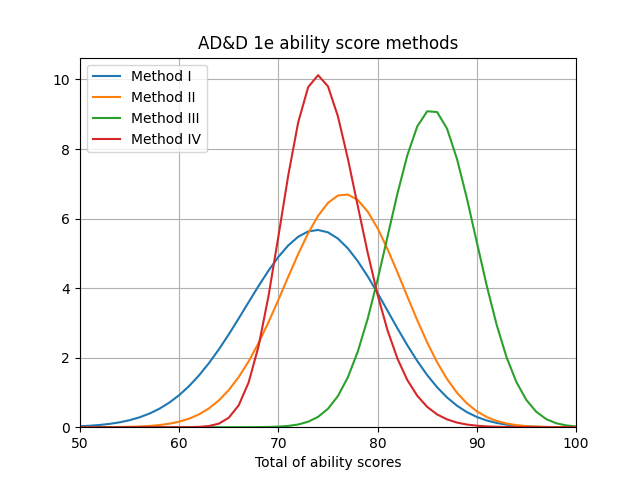

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(method1.outcomes(), method1.probabilities(percent=True))
ax.plot(method2.outcomes(), method2.probabilities(percent=True))
ax.plot(method3.outcomes(), method3.probabilities(percent=True))
ax.plot(method4.outcomes(), method4.probabilities(percent=True))
ax.set_title('AD&D 1e ability score methods')
ax.legend(['Method I', 'Method II', 'Method III', 'Method IV'])
ax.set_xlabel('Total of ability scores')
ax.set_xlim(50, 100)
ax.set_ylim(0)
ax.grid(True)
plt.show()